# Análise dos Voos que não justificaram os atrasos

## Importando Bibliotecas

In [1]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

## Carragando o Banco de Dados

In [3]:
df = pd.read_csv('DelayedFlights.zip')

In [4]:
df['Year'].unique() # só ha valores de 2008

array([2008], dtype=int64)

In [5]:
# Excluindo a primeira coluna
df = df.drop(df.columns[:1], axis=1)

In [6]:
# Excluindo colunas que não serão utilizadas na análise
df.drop(['Year','TaxiIn', 'TaxiOut', 'TailNum', 'FlightNum', 'UniqueCarrier',
        'DepTime', 'CRSDepTime','ArrTime','CRSArrTime'], # horários
                       axis=1, inplace=True)

In [7]:
df.shape

(1936758, 19)

In [8]:
df.nunique()

Month                  12
DayofMonth             31
DayOfWeek               7
ActualElapsedTime     673
CRSElapsedTime        515
AirTime               650
ArrDelay             1128
DepDelay             1058
Origin                303
Dest                  304
Distance             1419
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay          983
WeatherDelay          599
NASDelay              574
SecurityDelay         156
LateAircraftDelay     564
dtype: int64

In [9]:
print('Verificando se há valores de tempo negativos')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<0]['AirTime']))

Verificando se há valores de tempo negativos
ActualElapsedTime 0
CRSElapsedTime 6
AirTime 0


In [10]:
print('Verificando se há valores de tempo zerados ou negativos')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados ou negativos
ActualElapsedTime 0
CRSElapsedTime 6
AirTime 7


- 'CRSElapsedTime' registra o tempo de voo programado em minutos, valores negativos são valores incosistentes, logo, precisam ser retirados.

In [11]:
df = df[df['CRSElapsedTime']>=0]

Valores Zerados ou são de voos cancelados, Desviados ou são registros errados

In [12]:
# Filtrando voos não cancelados
df = df[df['Cancelled']==0]
# como já foi retirado os cancelados, não precisa manter a coluna de cancelados e seus motivos
df.drop(['Cancelled','CancellationCode'],axis=1, inplace=True)
# filtrando os voos não desviados
df = df[df['Diverted']==0]
df.drop(['Diverted'],axis=1, inplace=True)


In [13]:
print('Verificando se há valores de tempo zerados ou negativos')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados ou negativos
ActualElapsedTime 0
CRSElapsedTime 0
AirTime 7


como o AirTime ainda apareceu valores inconsistentes, foram retirados do df

In [14]:
df= df[df['AirTime']>0]

In [15]:
# verificando se foram retirados todos os dados zerados nas colunas especificadas
print('Verificando se há valores de tempo zerados')
print('ActualElapsedTime',len(df[df['ActualElapsedTime']<=0]['ActualElapsedTime']))
print('CRSElapsedTime',len(df[df['CRSElapsedTime']<=0]['CRSElapsedTime']))
print('AirTime',len(df[df['AirTime']<=0]['AirTime']))

Verificando se há valores de tempo zerados
ActualElapsedTime 0
CRSElapsedTime 0
AirTime 0


Verificar a quantidade de linhas com valores nulos

In [17]:
df.isnull().sum().sort_values(ascending=False)

CarrierDelay         680881
WeatherDelay         680881
NASDelay             680881
SecurityDelay        680881
LateAircraftDelay    680881
Month                     0
DayofMonth                0
DayOfWeek                 0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
dtype: int64

Voos que não sofreram atrasos são caracterizados por valores nulos nas colunas que demonstram qualquer tipo de atraso (LateAircraftDelay, SecurityDelay, NASDelay, WeatherDelay e CarrierDelay)

In [18]:
df = df[df.isnull().any(axis=1)]  # DataFrame com linhas contendo valores nulos
# agora df tem voos sem atrasos ou sem atrasos justificados pelos campos 
# (LateAircraftDelay, SecurityDelay, NASDelay, WeatherDelay e CarrierDelay

In [19]:
len(df) 
# a quantidade de linhas é a quantidade de null nas colunas CarrierDelay, WeatherDelay, NASDelay, SecurityDelay e LateAircraftDelay

680881

In [20]:
# podemos retirar as colunas referentes as justificativa de atrasos
df.drop(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],axis=1, inplace=True)

In [21]:
print('verificado os nulos depois do tratamento')
df.isnull().sum().sort_values(ascending=False)

verificado os nulos depois do tratamento


Month                0
DayofMonth           0
DayOfWeek            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
dtype: int64

In [22]:
df.describe()

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance
count,680881.000000,680881.000000,680881.000000,680881.000000,680881.000000,680881.000000,680881.000000,680881.000000,680881.000000
mean,6.185651,15.800836,3.994011,129.509851,138.656770,109.847371,3.557158,12.704079,807.754246
std,3.427159,8.746152,2.001106,71.469531,74.042342,69.464582,7.836563,6.415863,597.213848
min,1.000000,1.000000,1.000000,15.000000,24.000000,1.000000,-109.000000,6.000000,30.000000
25%,3.000000,8.000000,2.000000,76.000000,84.000000,58.000000,-1.000000,8.000000,361.000000
50%,6.000000,16.000000,4.000000,112.000000,120.000000,92.000000,5.000000,11.000000,641.000000
75%,9.000000,23.000000,6.000000,160.000000,170.000000,139.000000,10.000000,16.000000,1048.000000
max,12.000000,31.000000,7.000000,664.000000,660.000000,631.000000,14.000000,96.000000,4962.000000


In [23]:
# os regisros com valores nulos e negativos de ArrDelay foram analisados no arquivo 'analise_adiantados.ipynb'
df = df[df['ArrDelay']>0]

Devido a grande distância entre o quartil de 75% e o valor máximo do DepDelay, foram retirados registros acima do quantil de 95%

In [24]:
# Calcular o quantil de 95%
quantil_95 = df['DepDelay'].quantile(0.95)

# Aplicar o filtro
df  = df.loc[df['DepDelay'] <= quantil_95]

Levando em consideração que o campo AirTime indica o tempo no ar em minutos, não faz sentido que um voo dure apenas uns minutos no ar. Por isso, será retirado os primeiro 5% dos dados de AirTime

In [25]:
# Calcular o quantil de 5%
quantil_5 = df['AirTime'].quantile(0.05)

# Aplicar o filtro
df  = df.loc[df['AirTime'] >= quantil_5]

In [26]:
lista_var_continuas = ['ActualElapsedTime','CRSElapsedTime', 
                       'AirTime','ArrDelay','DepDelay','Distance']
lista_var_discretas = ['Month','DayofMonth','DayOfWeek']

# verificando novamente
df[lista_var_continuas].describe()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance
count,435512.000000,435512.000000,435512.000000,435512.000000,435512.000000,435512.000000
mean,123.899865,129.225284,103.713349,7.560726,12.886150,741.983690
std,65.885507,66.326414,63.650422,3.923283,5.348385,538.424819
min,37.000000,34.000000,32.000000,1.000000,6.000000,64.000000
25%,76.000000,80.000000,57.000000,4.000000,8.000000,348.000000
50%,106.000000,111.000000,86.000000,8.000000,12.000000,590.000000
75%,152.000000,157.000000,130.000000,11.000000,16.000000,957.000000
max,664.000000,660.000000,631.000000,14.000000,27.000000,4962.000000


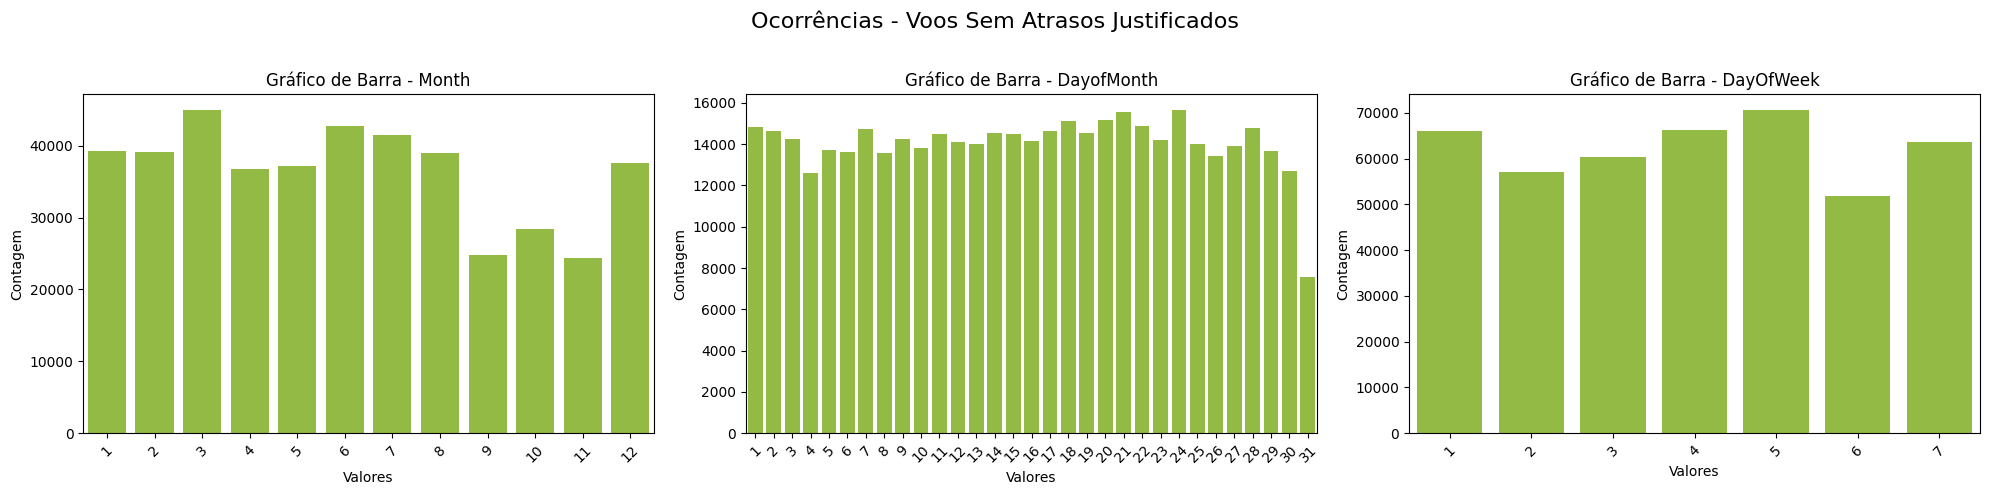

In [27]:
# Criar gráficos de barra para variáveis discretas
fig, axs =plt.subplots(1,3, figsize = (20,5))

for i, ax in zip(lista_var_discretas, axs.flatten()):
    sns.countplot(x=i, data=df[[i]], ax=ax, color='YellowGreen')
    ax.set_title(f'Gráfico de Barra - {i}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Contagem')

    # Ajusta a rotação dos rótulos para melhor legibilidade
    ax.tick_params(axis='x', rotation=45)
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Ocorrências - Voos Sem Atrasos Justificados', fontsize=16)
# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

# Exibe a figura
plt.show()

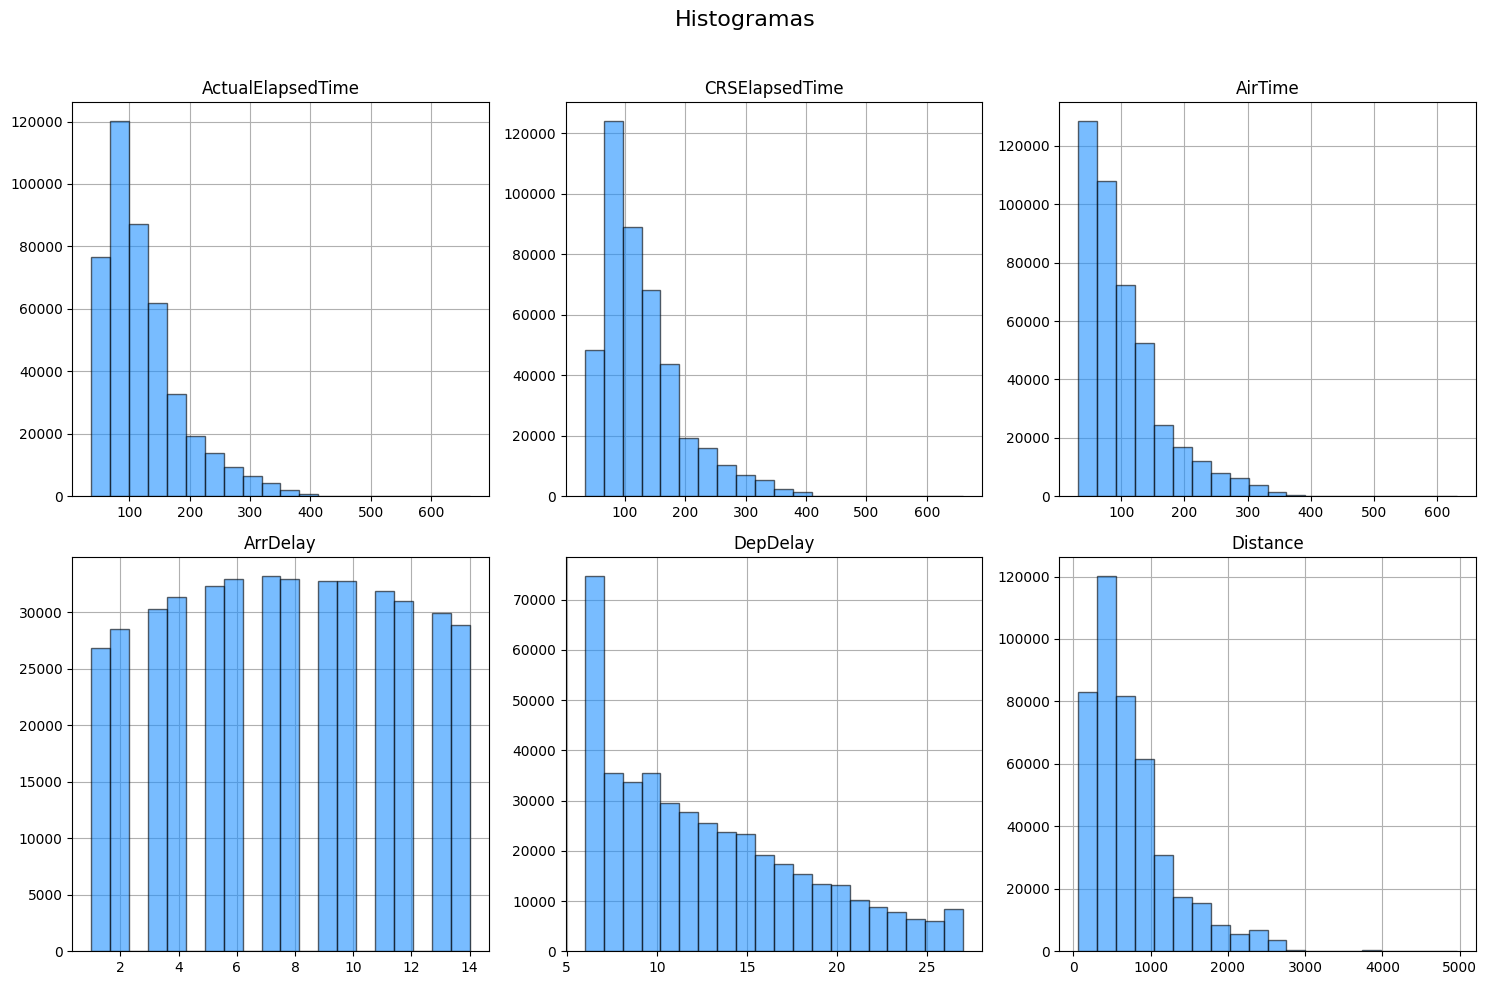

In [28]:
# Criação do grid de subgráficos 4x4
fig, axs = plt.subplots(2, 3, figsize=(15, 10))


for i, ax in zip(lista_var_continuas, axs.flatten()):
    df[i].hist(bins=20, edgecolor='black', alpha=0.6, color ='DodgerBlue',ax=ax, zorder=4)
    ax.set_title(f'{i}')
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Histogramas', fontsize=16, zorder=1)  # Definindo zorder para o título geral

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

plt.show()

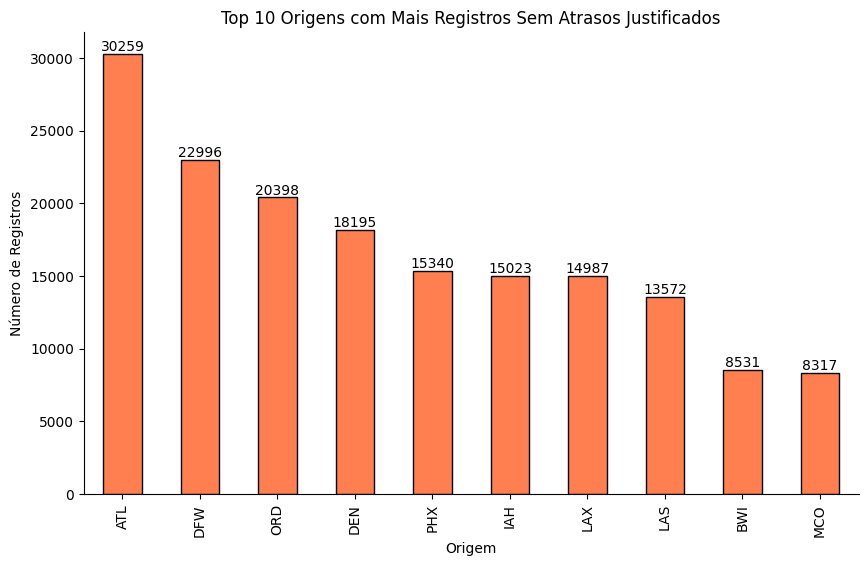

In [29]:
# Gráfico de barras para as 10 origens com mais registros
plt.figure(figsize=(10, 6))
df['Origin'].value_counts().nlargest(10).plot(kind='bar', color='coral', edgecolor='black', linewidth=1)

# Adicionar rótulos e título
plt.title('Top 10 Origens com Mais Registros Sem Atrasos Justificados')
plt.xlabel('Origem')
plt.ylabel('Número de Registros')

# Adicionar anotações com o número de registros em cada barra
for i, value in enumerate(df['Origin'].value_counts().nlargest(10)):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Remover a borda direita e superior do gráfico
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

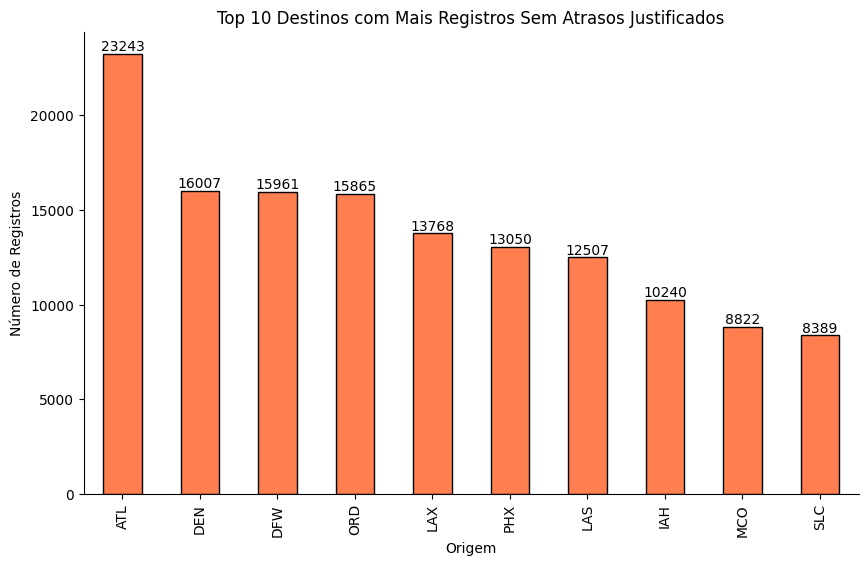

In [30]:
# Gráfico de barras para as 10 origens com mais registros
plt.figure(figsize=(10, 6))
df['Dest'].value_counts().nlargest(10).plot(kind='bar', color='coral', edgecolor='black', linewidth=1)

# Adicionar rótulos e título
plt.title('Top 10 Destinos com Mais Registros Sem Atrasos Justificados')
plt.xlabel('Origem')
plt.ylabel('Número de Registros')

# Adicionar anotações com o número de registros em cada barra
for i, value in enumerate(df['Dest'].value_counts().nlargest(10)):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Remover a borda direita e superior do gráfico
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)